## Particle Swarm Optimization Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pso import ParticleSwarm

In [2]:
def function_to_optimize(x):
    # rosenbrock
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

In [3]:
search_area=np.array([[-100, 100], [-100, 100]])

pso=ParticleSwarm(search_area=search_area, update_function="bare_bones")

best_pop, best_eval=pso.optimize(function_to_optimize, n_iterations=300)

Generation 0: best pop=[  2.13010461 -64.34017214], value=474412.52281613083
Generation 1: best pop=[  1.90394621 -63.6312788 ], value=452341.671143944
Generation 2: best pop=[ 2.27404059 10.11698478], value=2447.6419315752755
Generation 3: best pop=[ 2.27404059 10.11698478], value=2447.6419315752755
Generation 4: best pop=[ 7.16225228 53.10171657], value=363.3640392089924
Generation 5: best pop=[ 7.16225228 53.10171657], value=363.3640392089924
Generation 6: best pop=[ 7.16225228 53.10171657], value=363.3640392089924
Generation 7: best pop=[ 7.16225228 53.10171657], value=363.3640392089924
Generation 8: best pop=[ 7.16225228 53.10171657], value=363.3640392089924
Generation 9: best pop=[ 7.17399687 52.875646  ], value=236.76327557632308
Generation 10: best pop=[ 6.21999476 39.07200671], value=41.96875687304866
Generation 11: best pop=[ 6.21999476 39.07200671], value=41.96875687304866
Generation 12: best pop=[ 5.22394046 27.01750734], value=25.242608793414696
Generation 13: best pop=[ 5

In [23]:
x=np.arange(-2,2,0.1)
y=np.arange(-2,2,0.1)

In [24]:
combinations = np.array(np.meshgrid(x, y)).T.reshape(-1,2)

In [25]:
combinations

array([[-2. , -2. ],
       [-2. , -1.9],
       [-2. , -1.8],
       ...,
       [ 1.9,  1.7],
       [ 1.9,  1.8],
       [ 1.9,  1.9]])

In [26]:
z=np.apply_along_axis(function_to_optimize, 1, combinations)

In [27]:
zz=z.reshape(-1, len(x)).T

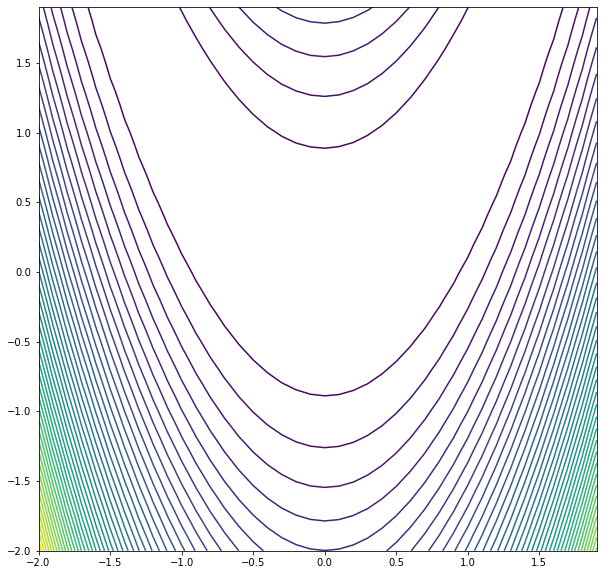

In [44]:
plt.figure(figsize=(10, 10))
plt.contour(x, y, zz, 50)